# Kickstarter 2018
### Lab17: Data Visualization B
##### Paul Leonard 12/1/2020

## Importing data and libraries
Data Source: https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("./ks-projects-201801.csv")

print()

## What were the outcomes of all 2018 Kickstarter campaigns?

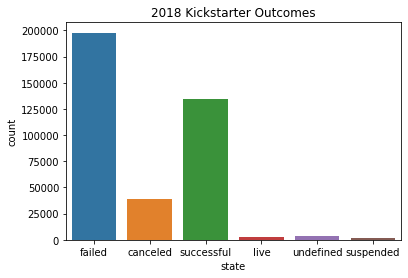

In [106]:
# sns.barplot(x="state",y="campaigns",data=df[["state"]])
sns.countplot(data=df[["state"]],x="state").set_title("2018 Kickstarter Outcomes")
print()

## Wow!  That's a lot... maybe we should just look at the US.

## But which countries actually had Kickstarter campaigns in 2018?

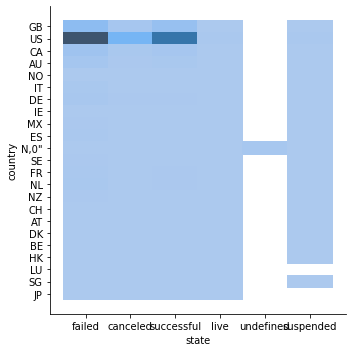

In [107]:
sns.displot(df, x="state", y="country")
print()

## That gradient sure makes it look like the US had the vast majority!

## Let's quanitfy how many more campaigns the US had:

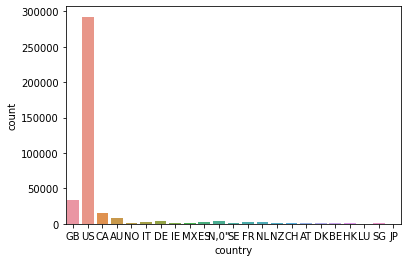

In [108]:
sns.countplot(data=df[["country"]],x="country")
print()

## For just the US, how did each of the Kickstarter campagins fare?

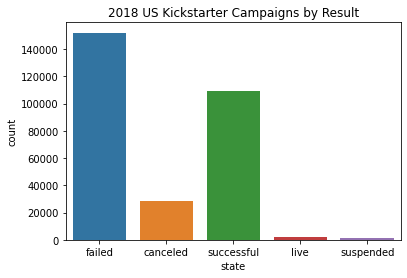

In [109]:
usdf = df[df.country == "US"]
result_bar = sns.countplot(data=usdf[["state"]],x="state")
result_bar.set_title("2018 US Kickstarter Campaigns by Result")
print()


## That is a lot of campaigns that failed.

## I wonder if the type of campaign it was had an affect on success or failure?

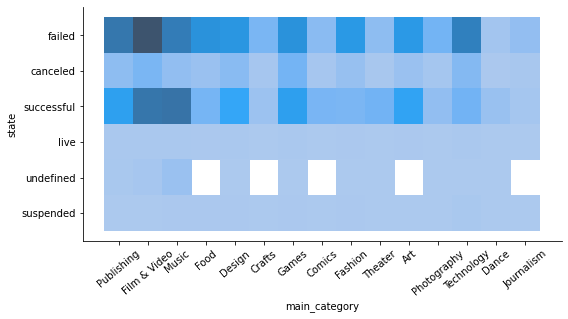

In [110]:
fig_size = (12,8)
heatmap = sns.displot(df, x="main_category", y="state", label="US Kickstarter Campaign Outcome Across Categories", height=4, aspect=2).set_titles("US Kickstarter")
heatmap.set_xticklabels(rotation=40)
heatmap.set_titles("US Kickstarter Campaign Outcome Across Categories")

# print()

## This gradient is pretty washed out too.  Let's look at which categories had the most campaigns in 2018.

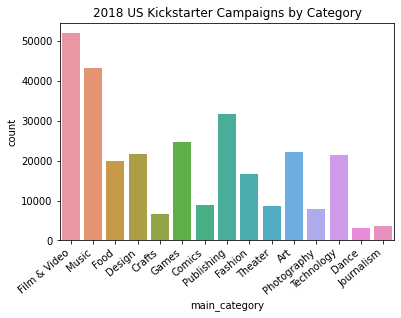

In [111]:
cat_histo = sns.countplot(data=usdf[["main_category"]],x="main_category",orient="h")
cat_histo.set_xticklabels(
    cat_histo.get_xticklabels(),
    rotation=40,
    horizontalalignment='right',
    fontweight='light',
)
cat_histo.set_title("2018 US Kickstarter Campaigns by Category")
print()

## Turns out, the categories are pretty distributed... let's go back and look at a more detailed heatmap of which categories failed and succeded.

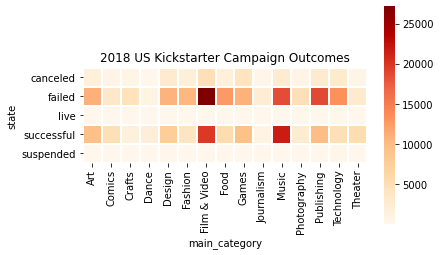

In [112]:
table_cat_vs_state = (usdf
    .groupby(["state","main_category"])
    .size()
    .unstack()
)

heatmap2 = sns.heatmap(
    table_cat_vs_state,
    square=True,
    cbar_kws={'fraction' : 0.1},
    cmap='OrRd',
    linewidth=1
)

heatmap2.set_title("2018 US Kickstarter Campaign Outcomes")
print()

## What percentage of US Kickstarter campaigns were successful in 2018?

In [113]:
states_on_top = (usdf
    .groupby(["main_category","state"])
    .size()
    .unstack()
)
states_on_top["successful"].value_counts()
states_on_top[["canceled","failed","live","successful","suspended"]].value_counts()
state_counts = states_on_top[["canceled","failed","live","successful","suspended"]].sum()
total_campaigns = state_counts.sum()
percentage_successful_campaigns = state_counts.successful / total_campaigns
percentage_successful_campaigns.round(4) * 100

37.35

## The nice numerical table below can offer specifics on successes and failures across the categories.

In [114]:
states_on_top[["canceled","failed","live","successful","suspended"]].groupby(["main_category"]).sum()


state,canceled,failed,live,successful,suspended
main_category,,,,,
Art,1667,10953,124,9496,71
Comics,673,3339,59,4820,19
Crafts,598,4323,46,1640,41
Dance,126,993,12,2088,9
Design,2857,10804,171,7681,177
Fashion,1811,10416,148,4120,89
Film & Video,4693,27151,212,19782,84
Food,1688,12683,129,5350,91
Games,4099,10873,165,9356,143


# Insights from the Data
- The US is the main country to use Kickstarter.
- Use in countries besides the US is very low.
- Film, video, and music are the most common categories for Kickstarter campaigns.
- Most campaigns fail.
- However, 37.35% of them succede!